In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:................\ABC_data.csv')

In [3]:
df.head()

,Item,UnitSold,CostUnit,Revenue
0,A1,21000,0.5,10500.0
1,A2,10000,0.5,5000.0
2,A3,16000,1.5,24000.0
3,A4,50000,3.5,175000.0
4,A5,15000,0.1,1500.0


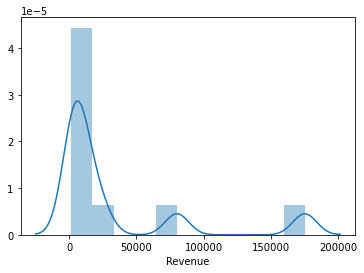

In [4]:
sns.distplot(df['Revenue'])

In [5]:
# Creating Bin
def bins(x):
    for bar in range(5000, 200000, 10000):
        if x <= bar:
            return bar
# New column for the bin function
df["rdist"] = df["Revenue"].apply(lambda x: bins(x))

In [6]:
# For pivot table purposes
df["count"] = 1
# Creating table for revenue distribution 
pivot_table = pd.pivot_table(df, index = ["rdist"], values = ["count"], aggfunc = np.sum)

In [7]:
from sklearn.cluster import KMeans

In [8]:
#for A,B,C we need cluster =3
kmeans = KMeans(n_clusters=3)

In [9]:
kmeans.fit(pivot_table)

KMeans(n_clusters=3)

In [10]:
pivot_table["category"] = kmeans.labels_

In [11]:
#creating dictionary 
ABC_dict = {    
    0: "A",
    1: "C",
    2: "B"
}

In [12]:
pivot_table["ABC"] = pivot_table["category"].apply(lambda x: ABC_dict[x])

In [13]:
df = pd.merge(df, pivot_table, on = "rdist", how ="left")

In [14]:
df

,Item,UnitSold,CostUnit,Revenue,rdist,count_x,count_y,category,ABC
0,A1,21000,0.50,10500.0,15000,1,3,2,B
1,A2,10000,0.50,5000.0,5000,1,4,1,C
2,A3,16000,1.50,24000.0,25000,1,1,0,A
3,A4,50000,3.50,175000.0,175000,1,1,0,A
4,A5,15000,0.10,1500.0,5000,1,4,1,C
5,A6,40000,2.00,80000.0,85000,1,1,0,A
6,A7,80000,0.03,2400.0,5000,1,4,1,C
7,A8,120000,0.05,6000.0,15000,1,3,2,B
8,A9,15000,0.25,3750.0,5000,1,4,1,C
9,A10,10000,1.50,15000.0,15000,1,3,2,B


Special thanks to Andrew Udell - https://towardsdatascience.com/abc-analysis-with-k-means-clustering-10d63ffff5b